In [1]:
import pandas as pd

csv_path = 'C:\\Users\\saeed\\Downloads\\MBA thesis\\master-dscience\\data\\DAX_calculated.csv'

df = pd.read_csv(csv_path)

print(df.head())

         Date         Open         High          Low        Close   
0  2015-01-02  9869.129883  9879.530273  9687.259766  9764.730469  \
1  2015-01-05  9735.650391  9790.269531  9468.580078  9473.160156   
2  2015-01-06  9484.250000  9624.650391  9382.820313  9469.660156   
3  2015-01-07  9510.339844  9592.370117  9459.179688  9518.179688   
4  2015-01-08  9643.769531  9855.429688  9607.900391  9837.610352   

     Adj Close       Volume   Returns  MA10  MA15  Volatility  RSI  
0  9764.730469   67673900.0       NaN   NaN   NaN         NaN  NaN  
1  9473.160156  105538300.0 -0.029860   NaN   NaN         NaN  NaN  
2  9469.660156   96812300.0 -0.000369   NaN   NaN         NaN  NaN  
3  9518.179688   82466600.0  0.005124   NaN   NaN         NaN  NaN  
4  9837.610352  114825000.0  0.033560   NaN   NaN         NaN  NaN  


In [2]:
df.dropna(subset=['RSI'], inplace=True)

In [3]:
df = df.drop('Adj Close', axis=1)

In [4]:
print(df.head())

          Date          Open          High           Low         Close   
14  2015-01-22  10300.259766  10454.049805  10228.530273  10435.620117  \
15  2015-01-23  10503.330078  10704.320313  10502.849609  10649.580078   
16  2015-01-26  10592.969727  10807.570313  10589.070313  10798.330078   
17  2015-01-27  10785.900391  10810.570313  10592.459961  10628.580078   
18  2015-01-28  10719.400391  10728.830078  10552.759766  10710.969727   

         Volume   Returns          MA10          MA15  Volatility        RSI  
14  151255800.0  0.013243  10062.319043   9912.435417    0.207166  67.775765  
15  167797300.0  0.020503  10162.427051   9971.425391    0.163048  71.282270  
16  105118600.0  0.013968  10264.070020  10059.770052    0.163143  73.445668  
17  115893500.0 -0.015720  10332.828027  10137.031380    0.202837  67.222147  
18  113074200.0  0.007752  10422.216992  10216.550716    0.172191  68.612344  


In [5]:
# Display general information about the DataFrame
print(df.info())

# Display summary statistics of the numeric columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 2269 entries, 14 to 2282
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2269 non-null   object 
 1   Open        2269 non-null   float64
 2   High        2269 non-null   float64
 3   Low         2269 non-null   float64
 4   Close       2269 non-null   float64
 5   Volume      2269 non-null   float64
 6   Returns     2269 non-null   float64
 7   MA10        2269 non-null   float64
 8   MA15        2269 non-null   float64
 9   Volatility  2269 non-null   float64
 10  RSI         2269 non-null   float64
dtypes: float64(10), object(1)
memory usage: 212.7+ KB
None
               Open          High           Low         Close        Volume   
count   2269.000000   2269.000000   2269.000000   2269.000000  2.269000e+03  \
mean   12808.983457  12887.697362  12723.976147  12808.242774  8.670105e+07   
std     1866.104322   1862.254419   1870.236298   1867.806765  3.43

In [6]:
# Check for missing values
print(df.isnull().sum())


Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Returns       0
MA10          0
MA15          0
Volatility    0
RSI           0
dtype: int64


In [7]:
# Display data types of each column
print(df.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Returns       float64
MA10          float64
MA15          float64
Volatility    float64
RSI           float64
dtype: object


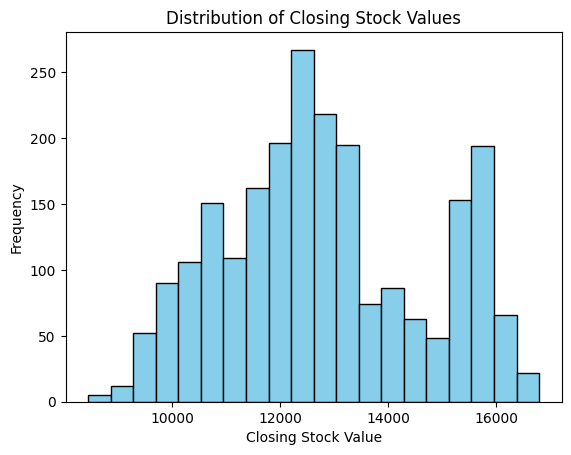

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram of the 'close' column
plt.hist(df['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Closing Stock Values')
plt.xlabel('Closing Stock Value')
plt.ylabel('Frequency')
plt.show()

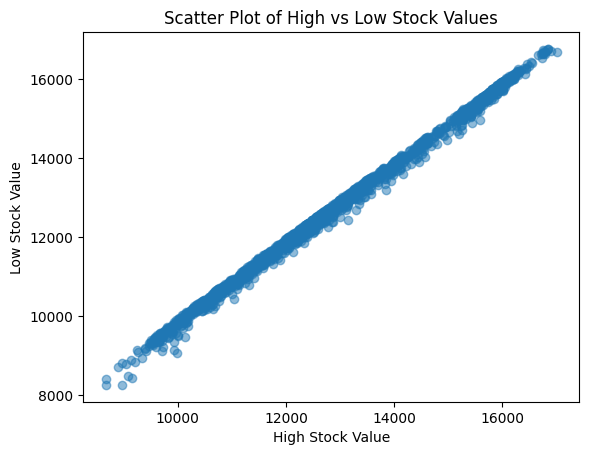

In [9]:
#Scatter plot of 'high' vs 'low'
plt.scatter(df['High'], df['Low'], alpha=0.5)
plt.title('Scatter Plot of High vs Low Stock Values')
plt.xlabel('High Stock Value')
plt.ylabel('Low Stock Value')
plt.show()


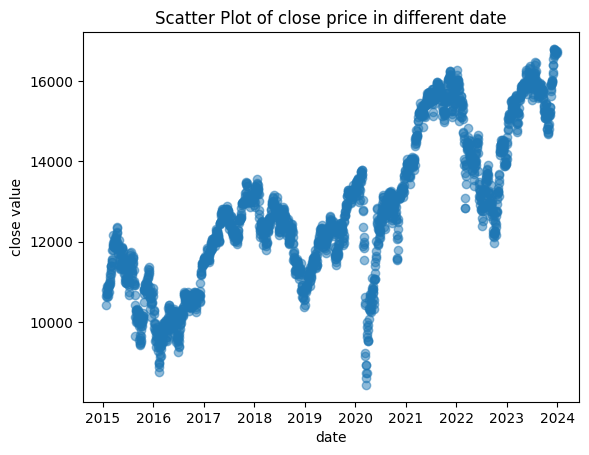

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'date' is not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.scatter(df['Date'], df['Close'], alpha=0.5)
plt.title('Scatter Plot of close price in different date')
plt.xlabel('date')
plt.ylabel('close value')

# Specify date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In [11]:
df.set_index('Date', inplace=True)

In [12]:
print(df.dtypes)

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Returns       float64
MA10          float64
MA15          float64
Volatility    float64
RSI           float64
dtype: object


In [13]:

# Shift the 'close' column to get the next day's closing price
df['next_day_Close'] = df['Close'].shift(-1)

# Drop the last row since it will have NaN in 'next_day_close'
df = df.dropna()

# X contains your features (all columns except 'next_day_close')
X = df.drop('next_day_Close', axis=1)

# y is your target variable ('next_day_close')
y = df['next_day_Close']



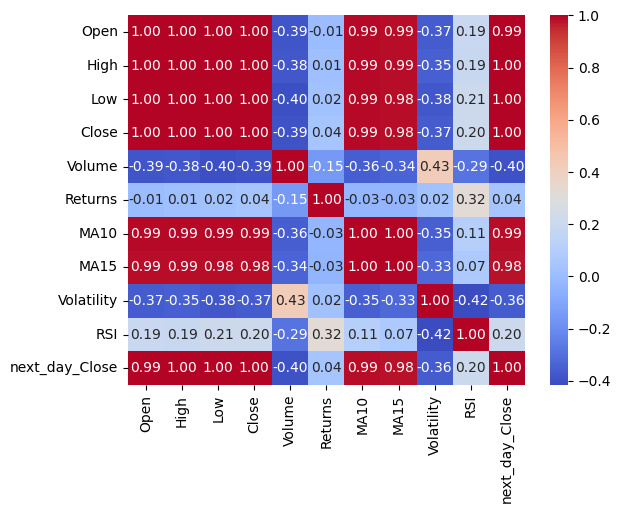

In [14]:
import seaborn as sns

# Assuming X is your feature matrix and y is your target variable
correlation_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

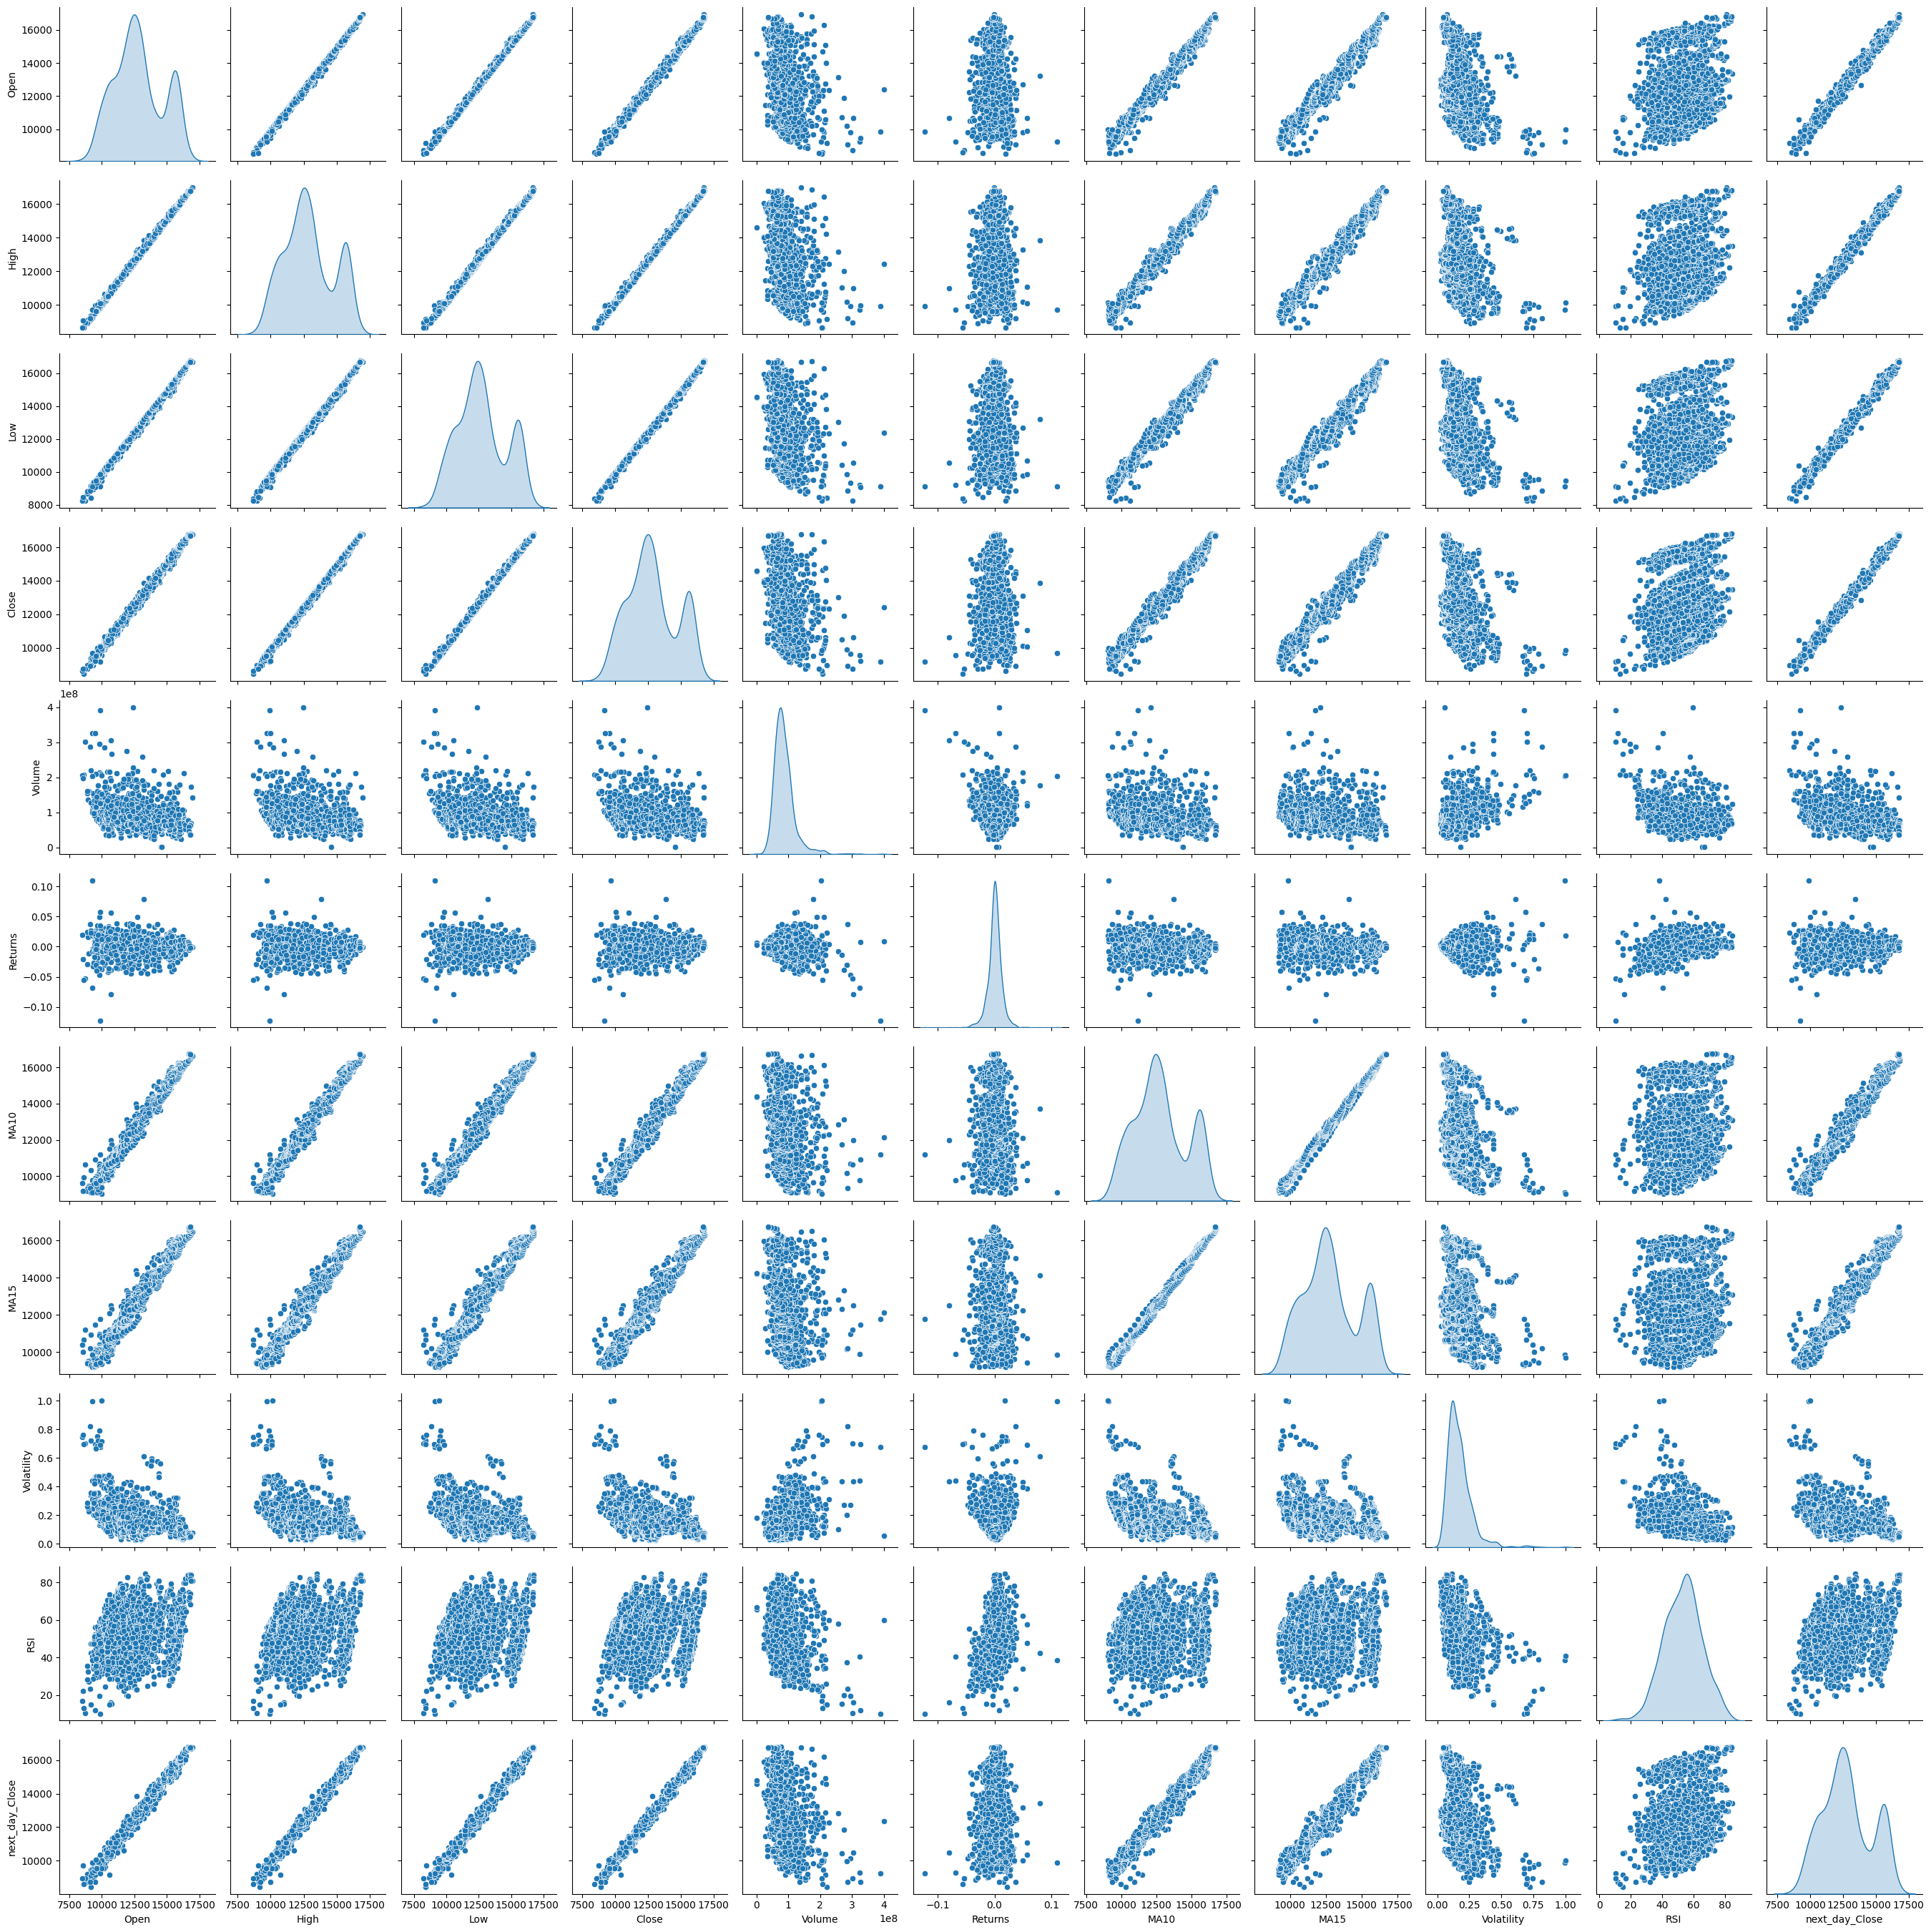

In [15]:
sns.pairplot(pd.concat([X, y], axis=1), kind="scatter", diag_kind="kde")
plt.show()

In [16]:
# Split the dataset into training and test sets (e.g., 80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X.head()

,Open,High,Low,Close,Volume,Returns,MA10,MA15,Volatility,RSI
Date,,,,,,,,,,
2015-01-22,10300.259766,10454.049805,10228.530273,10435.620117,151255800.0,0.013243,10062.319043,9912.435417,0.207166,67.775765
2015-01-23,10503.330078,10704.320313,10502.849609,10649.580078,167797300.0,0.020503,10162.427051,9971.425391,0.163048,71.282270
2015-01-26,10592.969727,10807.570313,10589.070313,10798.330078,105118600.0,0.013968,10264.070020,10059.770052,0.163143,73.445668
2015-01-27,10785.900391,10810.570313,10592.459961,10628.580078,115893500.0,-0.015720,10332.828027,10137.031380,0.202837,67.222147
2015-01-28,10719.400391,10728.830078,10552.759766,10710.969727,113074200.0,0.007752,10422.216992,10216.550716,0.172191,68.612344


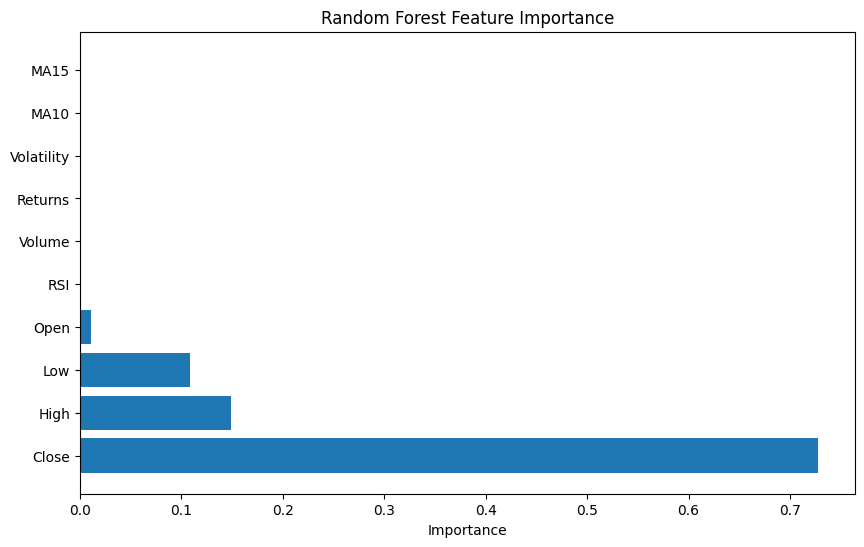

In [18]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestRegressor


# Step 3: Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Step 4: Get feature importances
feature_importances = rf_model.feature_importances_

# Step 5: Create a DataFrame to show feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [19]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
#index=X_train.index
#columns = X_train.columns
#norm = MinMaxScaler().fit(X_train)

# transform training data
#X_train_norm = norm.transform(X_train)
#X_train_normalized = pd.DataFrame(X_train_norm, columns=columns, index=index)

# transform testing dataabs
#index_test=X_test.index
#X_test_norm = norm.transform(X_test)
#X_test_normalized = pd.DataFrame(X_test_norm, columns=columns,index=index_test)

In [20]:
from sklearn.preprocessing import RobustScaler

# fit scaler on training data
index = X_train.index
columns = X_train.columns
scaler = RobustScaler().fit(X_train)

# transform training data
X_train_norm = scaler.transform(X_train)
X_train_normalized = pd.DataFrame(X_train_norm, columns=columns, index=index)

# transform testing data
index_test = X_test.index
X_test_norm = scaler.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_norm, columns=columns, index=index_test)


In [21]:
#X_test_scaled_df.head()

In [22]:
#  XGBoost regressor
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
#import xgboost as xgb


# Create an XGBoost model
#model_xgb = xgb.XGBRegressor()

# Train the model
#model_xgb.fit(X_train_scaled_df, y_train)

# Make predictions on the test set

#y_pred_xgb = model_xgb.predict(X_test_scaled_df)

# Evaluate accuracy
#mse = mean_squared_error(y_test, y_pred_xgb)
#print(f"XGBoost Regression MSE: {mse}")

In [23]:
X_train_normalized.head()

,Open,High,Low,Close,Volume,Returns,MA10,MA15,Volatility,RSI
Date,,,,,,,,,,
2023-09-12,1.158127,1.116537,1.170028,1.127843,-0.655792,-0.534241,1.190073,1.203500,-0.960866,-0.556717
2023-05-10,1.219647,1.179856,1.230367,1.193846,-0.375977,-0.387473,1.211455,1.233471,-0.317531,0.214429
2016-10-31,-0.711612,-0.721088,-0.707603,-0.716920,-0.287452,-0.318348,-0.731035,-0.769412,-0.747386,0.000510
2016-04-22,-0.813886,-0.816145,-0.822636,-0.823401,0.099563,-0.582350,-0.944991,-1.028232,0.132017,0.714238
2021-09-15,1.131745,1.092002,1.143037,1.091489,-0.627862,-0.655130,1.163247,1.197736,-0.429375,-0.656795


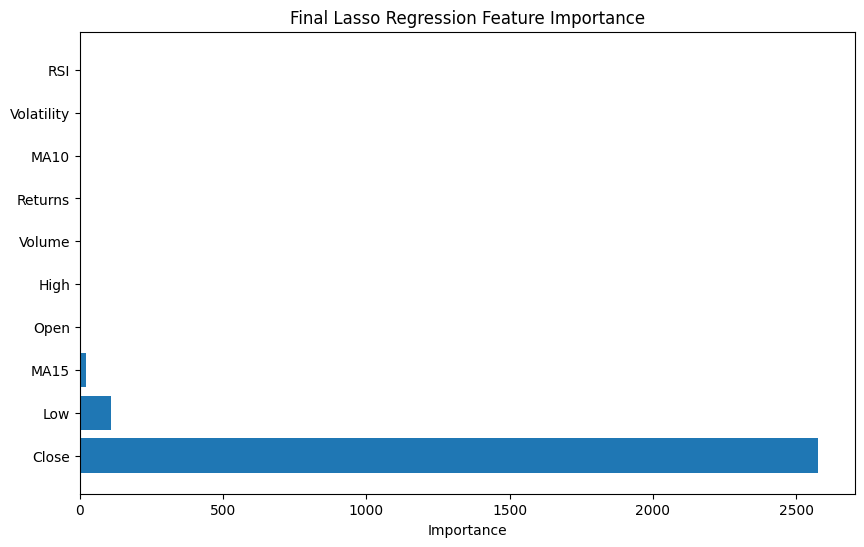

12.32846739442066

In [24]:
import numpy as np
from sklearn.linear_model import Lasso
# Step 2: Define a range of alpha values
alphas = np.logspace(-4, 2, 100)  # Adjust the range as needed

# Step 3: Train a Lasso Regression model for each alpha
best_alpha = None
best_score = float(0)  # Initialize with negative infinity, assuming you want to maximize some performance metric

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=50000)
    lasso_model.fit(X_train_normalized, y_train)
    
    # Evaluate the model, for example, using cross-validation or another metric
    # You can replace the following line with your own evaluation metric
    score = lasso_model.score(X_test_normalized, y_test)
    
    # Update the best alpha if the current model has a better performance
    if score > best_score:
        best_score = score
        best_alpha = alpha

# Step 4: Train the final Lasso Regression model with the best alpha
final_lasso_model = Lasso(alpha=best_alpha, max_iter=50000)
final_lasso_model.fit(X_train_normalized, y_train)

# Step 5: Get feature coefficients
final_lasso_coefficients = pd.Series(final_lasso_model.coef_, index=X_train_normalized.columns)
final_lasso_coefficients = final_lasso_coefficients.abs()

# Step 6: Create a DataFrame to show feature importances
final_lasso_importance_df = pd.DataFrame({'Feature': X_train_normalized.columns, 'Importance': final_lasso_coefficients})
final_lasso_importance_df = final_lasso_importance_df.sort_values(by='Importance', ascending=False)

# Step 7: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(final_lasso_importance_df['Feature'], final_lasso_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Final Lasso Regression Feature Importance')
plt.show()
best_alpha

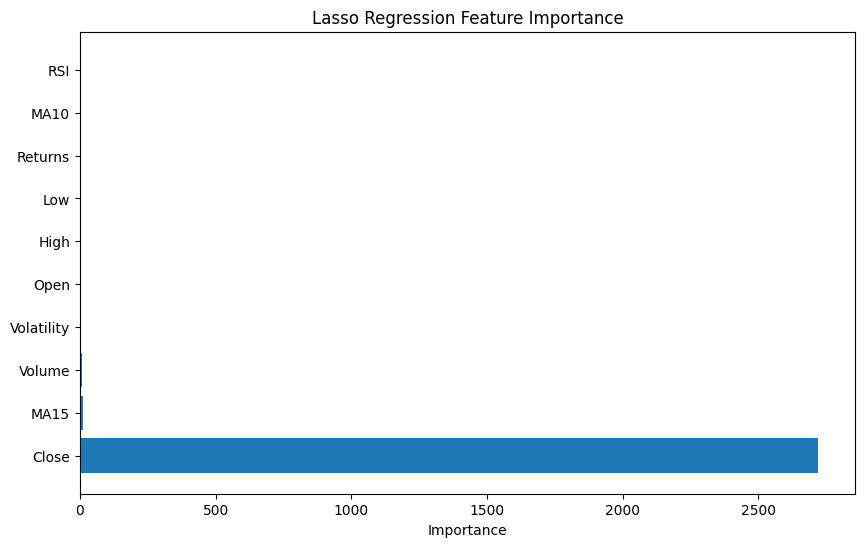

Best alpha: 1.0


In [25]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Normalize the data
#scaler = StandardScaler()
#X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Step 3: Train a Lasso Regression model with cross-validation
alphas = np.logspace(-4, 2, 100)

lasso_cv_model = LassoCV(alphas=alphas, cv=5, max_iter=50000)  # cv is the number of folds for cross-validation
lasso_cv_model.fit(X_train_normalized, y_train)

# Best alpha
best_alpha = lasso_cv_model.alpha_

# Step 4: Get feature coefficients
lasso_coefficients = pd.Series(lasso_cv_model.coef_, index=X_train.columns)
lasso_coefficients = lasso_coefficients.abs()  # Take the absolute values for importance

# Step 5: Create a DataFrame to show feature importances
lasso_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': lasso_coefficients})
lasso_importance_df = lasso_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(lasso_importance_df['Feature'], lasso_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Lasso Regression Feature Importance')
plt.show()

print("Best alpha:", best_alpha)


In [26]:
#  XGBoost regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import xgboost as xgb


# Create an XGBoost model
model_xgb = xgb.XGBRegressor()

# Train the model
model_xgb.fit(X_train_normalized, y_train)

# Make predictions on the test set

y_pred_xgb = model_xgb.predict(X_test_normalized)


# Evaluate XGBoost Regression

baseline_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
baseline_mse = mean_squared_error(y_test, y_pred_xgb)
baseline_mae = mean_absolute_error(y_test, y_pred_xgb)
baseline_r2 = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regression mean_absolute_percentage_error: {baseline_mape}")
print(f"XGBoost Regression MAE: {baseline_mae}")
print(f"XGBoost Regression MSE: {baseline_mse}")
print(f"XGBoost Regression R-squared: {baseline_r2}")

XGBoost Regression mean_absolute_percentage_error: 0.010348811603059522
XGBoost Regression MAE: 128.07571372714753
XGBoost Regression MSE: 29858.820716498056
XGBoost Regression R-squared: 0.9912624329464398


In [27]:
# Evaluating selected features by random forest feature importance using XGBoost regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


RandomForest_selected_features = ['Close', 'High','Low','Open']
X_train_xgb= X_train_normalized[RandomForest_selected_features]
# Create an XGBoost model
model_xgb = xgb.XGBRegressor()

# Train the model
model_xgb.fit(X_train_xgb, y_train)

# Make predictions on the test set
X_test_XGB=X_test_normalized[RandomForest_selected_features]
y_pred_xgb = model_xgb.predict(X_test_XGB)


# Evaluate XGBoost Regression

baseline_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
baseline_mse = mean_squared_error(y_test, y_pred_xgb)
baseline_mae = mean_absolute_error(y_test, y_pred_xgb)
baseline_r2 = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regression mean_absolute_percentage_error: {baseline_mape}")
print(f"XGBoost Regression MAE: {baseline_mae}")
print(f"XGBoost Regression MSE: {baseline_mse}")
print(f"XGBoost Regression R-squared: {baseline_r2}")

XGBoost Regression mean_absolute_percentage_error: 0.00988509514103708
XGBoost Regression MAE: 121.65377635338655
XGBoost Regression MSE: 28919.689147998353
XGBoost Regression R-squared: 0.991537250399205


In [28]:
# Evaluating selected features by Lasso Reggression feature importance using XGBoost regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


Lasso_selected_features = ['Close','Low','MA15']
X_train_xgb= X_train_normalized[Lasso_selected_features]
# Create an XGBoost model
model_xgb = xgb.XGBRegressor()

# Train the model
model_xgb.fit(X_train_xgb, y_train)

# Make predictions on the test set
X_test_XGB=X_test_normalized[Lasso_selected_features]
y_pred_xgb = model_xgb.predict(X_test_XGB)


# Evaluate XGBoost Regression

baseline_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
baseline_mse = mean_squared_error(y_test, y_pred_xgb)
baseline_mae = mean_absolute_error(y_test, y_pred_xgb)
baseline_r2 = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regression mean_absolute_percentage_error: {baseline_mape}")
print(f"XGBoost Regression MAE: {baseline_mae}")
print(f"XGBoost Regression MSE: {baseline_mse}")
print(f"XGBoost Regression R-squared: {baseline_r2}")

XGBoost Regression mean_absolute_percentage_error: 0.010057031649536122
XGBoost Regression MAE: 124.29743856153632
XGBoost Regression MSE: 27921.965997364303
XGBoost Regression R-squared: 0.991829213468086





15/15 [==============================] - 0s 2ms/step - loss: 30233.0195
Test MSE with SelectKBest: 30233.01953125
15/15 [==============================] - 0s 3ms/step - loss: 30233.0195
Test MSE with SelectKBest: 30233.01953125
MAE with SelectKBest: 121.11483860256055
MAPE with SelectKBest: 0.009775339206208841
R-squared with SelectKBest: 0.9911529309972629
Best Epoch: 470


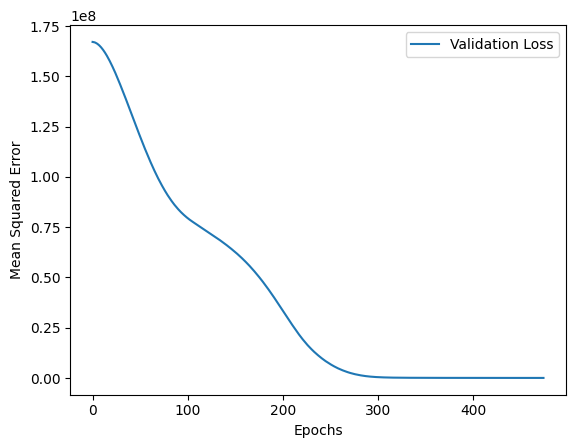

In [29]:
#ANN model 
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


# Assume you have X and y as your features and target variable
# X, y = ...

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Feature Selection Algorithms
#kbest = SelectKBest(score_func=f_regression, k=5)
#X_train_kbest = kbest.fit_transform(X_train, y_train)
#X_test_kbest = kbest.transform(X_test)

# Standardize the data
#scaler = StandardScaler()
#X_train_kbest = scaler.fit_transform(X_train_kbest)
#X_test_kbest = scaler.transform(X_test_kbest)

# Build ANN model
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='elu'))
    model.add(Dense(1, activation='linear'))
    custom_optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    return model

# Train-Validation Split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_normalized, y_train, test_size=0.2, random_state=42)

# Build and train ANN model with SelectKBest features and early stopping
model_kbest = build_model(X_train_split.shape[1])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model_kbest.fit(X_train_split, y_train_split, epochs=5000, batch_size=32, 
                           validation_data=(X_val_split, y_val_split), callbacks=[early_stopping], verbose=0)

y_pred = model_kbest.predict(X_test_normalized)
# Evaluate the model
mse_kbest = model_kbest.evaluate(X_test_normalized, y_test)
print(f"Test MSE with SelectKBest: {mse_kbest}")

mse_kbest = model_kbest.evaluate(X_test_normalized, y_test)
mae_kbest = mean_absolute_error(y_test, y_pred)
mape_kbest = mean_absolute_percentage_error(y_test, y_pred)  # Define the function as shown in the previous response
r2_kbest = r2_score(y_test, y_pred)

print(f"Test MSE with SelectKBest: {mse_kbest}")
print(f"MAE with SelectKBest: {mae_kbest}")
print(f"MAPE with SelectKBest: {mape_kbest}")
print(f"R-squared with SelectKBest: {r2_kbest}")

# Print the best epoch
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best Epoch: {best_epoch}")

import matplotlib.pyplot as plt

#history = model_kbest.history
#plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

plt.legend()
plt.show()


15/15 [==============================] - 0s 5ms/step - loss: 23305.4414
Test MSE with SelectKBest: 23305.44140625
15/15 [==============================] - 0s 3ms/step - loss: 23305.4414
Test MSE with SelectKBest: 23305.44140625
MAE with SelectKBest: 107.81255809801762
MAPE with SelectKBest: 0.00867679295645253
R-squared with SelectKBest: 0.993180144178158
Best Epoch: 533


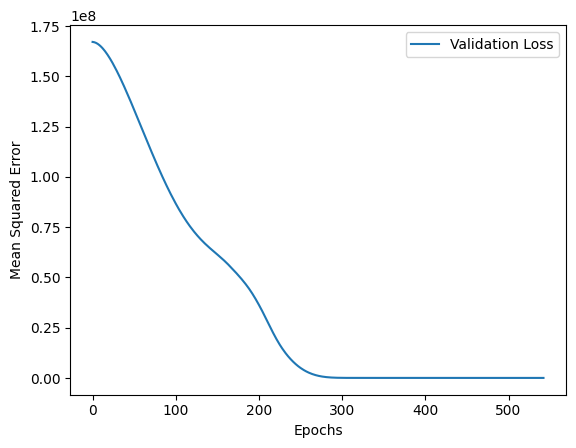

In [30]:
# Evaluating selected features by Lasso Reggression feature importance using ANN model
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
Lasso_selected_features = ['Close','Low','MA15']
X_train_ANN= X_train_normalized[Lasso_selected_features]
X_test_ANN= X_test_normalized[Lasso_selected_features]
# Assume you have X and y as your features and target variable
# X, y = ...

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Feature Selection Algorithms
#kbest = SelectKBest(score_func=f_regression, k=5)
#X_train_kbest = kbest.fit_transform(X_train, y_train)
#X_test_kbest = kbest.transform(X_test)

# Standardize the data
#scaler = StandardScaler()
#X_train_kbest = scaler.fit_transform(X_train_kbest)
#X_test_kbest = scaler.transform(X_test_kbest)

# Build ANN model
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='elu'))
    model.add(Dense(1, activation='linear'))
    custom_optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    return model

# Train-Validation Split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_ANN, y_train, test_size=0.2, random_state=42)

# Build and train ANN model with SelectKBest features and early stopping
model_kbest = build_model(X_train_split.shape[1])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model_kbest.fit(X_train_split, y_train_split, epochs=1000, batch_size=32, 
                           validation_data=(X_val_split, y_val_split), callbacks=[early_stopping], verbose=0)

# Evaluate the model
mse_kbest = model_kbest.evaluate(X_test_ANN, y_test)
print(f"Test MSE with SelectKBest: {mse_kbest}")

y_pred = model_kbest.predict(X_test_ANN)
mse_kbest = model_kbest.evaluate(X_test_ANN, y_test)
mae_kbest = mean_absolute_error(y_test, y_pred)
mape_kbest = mean_absolute_percentage_error(y_test, y_pred)  # Define the function as shown in the previous response
r2_kbest = r2_score(y_test, y_pred)

print(f"Test MSE with SelectKBest: {mse_kbest}")
print(f"MAE with SelectKBest: {mae_kbest}")
print(f"MAPE with SelectKBest: {mape_kbest}")
print(f"R-squared with SelectKBest: {r2_kbest}")

# Print the best epoch
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best Epoch: {best_epoch}")

import matplotlib.pyplot as plt

#history = model_kbest.history
#plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
#plt.ylim(0, 1)
plt.legend()
plt.show()



15/15 [==============================] - 0s 6ms/step - loss: 24021.1309
Test MSE with SelectKBest: 24021.130859375
15/15 [==============================] - 0s 3ms/step - loss: 24021.1309
Test MSE with SelectKBest: 24021.130859375
MAE with SelectKBest: 111.14124020773681
MAPE with SelectKBest: 0.00897475658817502
R-squared with SelectKBest: 0.9929707123152519
Best Epoch: 571


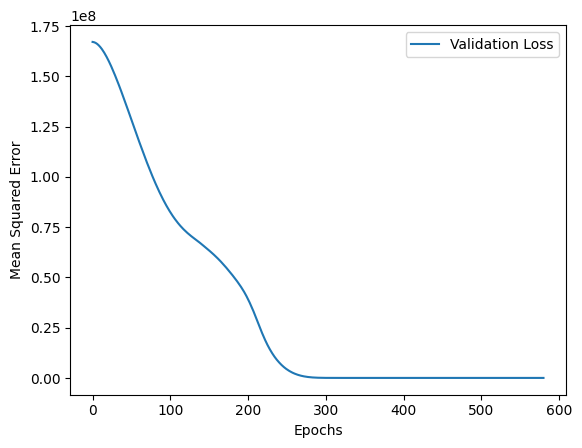

In [31]:
# Evaluating selected features by random forest feature importance using ANN model
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

RandomForest_selected_features = ['Close', 'High','Low','Open']
X_train_ANN= X_train_normalized[RandomForest_selected_features]
X_test_ANN= X_test_normalized[RandomForest_selected_features]

# Assume you have X and y as your features and target variable
# X, y = ...

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Feature Selection Algorithms
#kbest = SelectKBest(score_func=f_regression, k=5)
#X_train_kbest = kbest.fit_transform(X_train, y_train)
#X_test_kbest = kbest.transform(X_test)

# Standardize the data
#scaler = StandardScaler()
#X_train_kbest = scaler.fit_transform(X_train_kbest)
#X_test_kbest = scaler.transform(X_test_kbest)

# Build ANN model
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='elu'))
    model.add(Dense(1, activation='linear'))
    custom_optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    return model

# Train-Validation Split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_ANN, y_train, test_size=0.2, random_state=42)

# Build and train ANN model with SelectKBest features and early stopping
model_kbest = build_model(X_train_split.shape[1])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model_kbest.fit(X_train_split, y_train_split, epochs=1000, batch_size=32, 
                           validation_data=(X_val_split, y_val_split), callbacks=[early_stopping], verbose=0)

# Evaluate the model
mse_kbest = model_kbest.evaluate(X_test_ANN, y_test)
print(f"Test MSE with SelectKBest: {mse_kbest}")

y_pred = model_kbest.predict(X_test_ANN)
mse_kbest = model_kbest.evaluate(X_test_ANN, y_test)
mae_kbest = mean_absolute_error(y_test, y_pred)
mape_kbest = mean_absolute_percentage_error(y_test, y_pred)  # Define the function as shown in the previous response
r2_kbest = r2_score(y_test, y_pred)

print(f"Test MSE with SelectKBest: {mse_kbest}")
print(f"MAE with SelectKBest: {mae_kbest}")
print(f"MAPE with SelectKBest: {mape_kbest}")
print(f"R-squared with SelectKBest: {r2_kbest}")

# Print the best epoch
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best Epoch: {best_epoch}")

import matplotlib.pyplot as plt

#history = model_kbest.history
#plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
#plt.ylim(0, 50000)
plt.legend()
plt.show()

In [32]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
# Assuming you have X_train, X_test, y_train, y_test after splitting and normalizing
# your data for regression
# X_train, X_test, y_train, y_test = ...


X_train_1, X_val, y_train_1, y_val = train_test_split(X_train_normalized, y_train, test_size=0.2, random_state=42)


# Reshape the features for LSTM input (assuming a time series structure)
X_train_reshaped = np.reshape(X_train_1, (X_train_1.shape[0], 1, X_train_1.shape[1]))
X_test_reshaped = np.reshape(X_test_normalized, (X_test_normalized.shape[0], 1, X_test_normalized.shape[1]))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))


In [33]:
# Create an LSTM model
model_ANN = Sequential()
model_ANN.add(Dense(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_ANN.add(Dense(units=1))

# Compile the model
#model_lstm.compile(optimizer='adam', loss='mean_squared_error')
#model_lstm.fit(X_train_reshaped, y_train_1, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val))



early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_lstm.fit(X_train_reshaped, y_train_1, epochs=200, batch_size=32, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping])


# Train the model
#model_lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
#y_pred_lstm = model_lstm.predict(X_test_reshaped)

# Evaluate using Mean Squared Error (MSE)
#mse_lstm = mean_squared_error(y_test, y_pred_lstm)
#print(f"LSTM Regression MSE: {mse_lstm}")
import matplotlib.pyplot as plt

history = model_lstm.history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

NameError: name 'model_lstm' is not defined